In [125]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [126]:
crime = pd.read_csv('04_02_Person_arrested_and_their_disposal_by_police_and_court_IPC_crime_2012.csv')
crime = crime.drop(['CRIME HEAD'],axis='columns')
crime = crime.head(100)
crime

,STATE/UT,Persons in custody or on bail during the stage of investigation at the beginning of the year,Persons arrested during the year,Persons released or freed by Police or Magistrate before trial for want of evidence or any other reason,Persons in custody or on bail during the stage of investigation at the end of the year,Persons in whose cases charge sheets were laid during the year,Persons under trial at the beginning of the year,Total number of persons under trial during the year,Persons against whom cases were compounded or withdrawn,Persons in custody or on bail during the stage of trial at the end of the year,Persons in whose cases trials were completed during the year,Persons convicted,Persons acquitted
0,ANDHRA PRADESH,3263,5509,0,3138,5634,12111,17745,2,13142,4601,754,3847
1,ARUNACHAL PRADESH,85,113,28,109,61,1108,1169,0,1161,8,2,6
2,ASSAM,4628,1650,466,4756,1056,8040,9096,0,8183,913,308,605
3,BIHAR,7459,7198,51,7399,7207,52966,60173,0,54985,5188,1450,3738
4,CHHATTISGARH,188,1490,0,158,1520,7803,9323,1221,6661,1441,590,851
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,ODISHA,3,91,0,15,79,318,397,0,343,54,23,31
96,PUNJAB,235,157,5,264,123,530,653,1,547,105,35,70
97,RAJASTHAN,0,91,0,0,91,459,550,2,454,94,35,59
98,SIKKIM,2,0,0,0,2,3,5,0,4,1,1,0


In [127]:
crime.isna().sum()

STATE/UT                                                                                                   0
Persons in custody or on bail during the stage of investigation at the beginning of the year               0
Persons arrested during the year                                                                           0
Persons released or freed by Police or Magistrate before trial for want of evidence or any other reason    0
Persons in custody or on bail during the stage of investigation at the end of the year                     0
Persons in whose cases charge sheets were laid during the year                                             0
Persons under trial at the beginning of the year                                                           0
Total number of persons under trial during the year                                                        0
Persons against whom cases were compounded or withdrawn                                                    0
Persons in custody 

<AxesSubplot:xlabel='STATE/UT'>

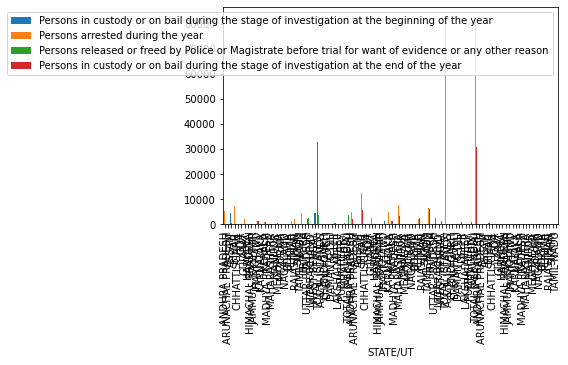

In [128]:
crime.plot(x="STATE/UT", y=["Persons in custody or on bail during the stage of investigation at the beginning of the year",
                            "Persons arrested during the year",
                            "Persons released or freed by Police or Magistrate before trial for want of evidence or any other reason",
                            "Persons in custody or on bail during the stage of investigation at the end of the year",], kind="bar")

In [138]:
x = crime.iloc[:, [1, 2,5,6,7,9,10]].values
y = crime.iloc[:, [-2]].values

In [130]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:,0] = le.fit_transform(x[:,0])

In [131]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [132]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [133]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

C:\Users\prath\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [134]:
y_pred  =  classifier.predict(x_test)

In [135]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [139]:
print(y_test)

[[  376]
 [   28]
 [  308]
 [   18]
 [12586]
 [    2]
 [    5]
 [    8]
 [    0]
 [   23]
 [    2]
 [    0]
 [    1]
 [ 1920]
 [  868]
 [   22]
 [   24]
 [   46]
 [  394]
 [   65]]


In [137]:
print(y_pred)

[58  3 58  8 58  0 35  1  2  1  2  0  7 58 58  7  8 35 58 35]
